In [ ]:
!pip install trimesh vedo numpy matplotlib ipywidgets



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.1 MB/s eta 0:00:00


Número de vértices: 2790
Número de aristas: 16704
Número de caras: 5568
Generando animación: todo


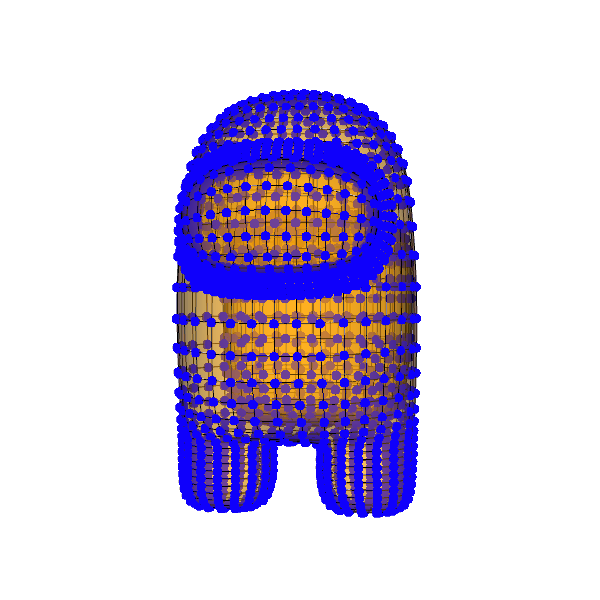

Generando animación: vertices


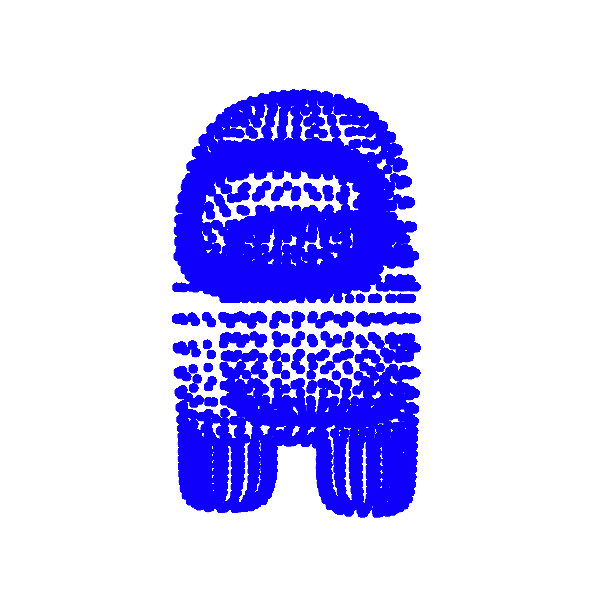

Generando animación: aristas


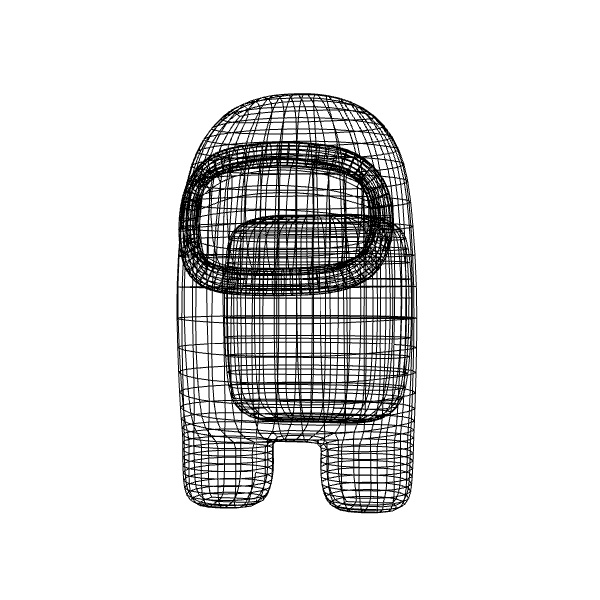

Generando animación: caras


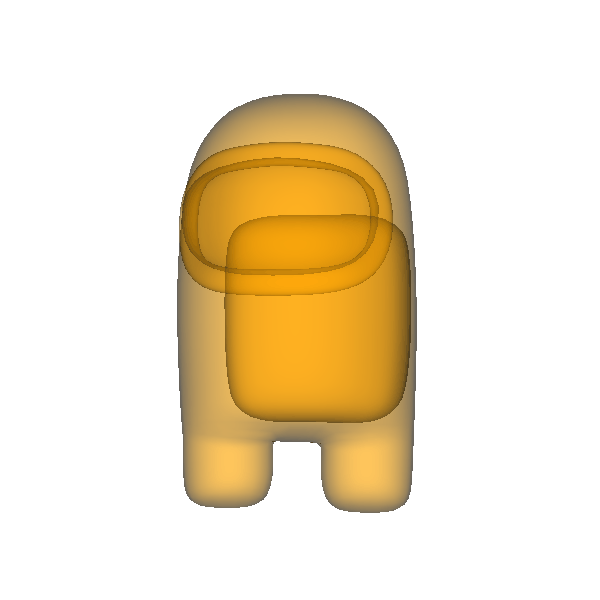

In [ ]:
import vedo
import trimesh
import imageio
import numpy as np

# Cargar modelo y crear geometría
mesh_trimesh = trimesh.load("/content/sample.obj")
mesh_vedo = vedo.load("/content/sample.obj")

# Información
print(f"Número de vértices: {len(mesh_trimesh.vertices)}")
print(f"Número de aristas: {len(mesh_trimesh.edges)}")
print(f"Número de caras: {len(mesh_trimesh.faces)}")

# Componentes visuales
faces = mesh_vedo.clone().c('orange').alpha(0.4)
edges = mesh_vedo.clone().lw(1).c('black').wireframe(True)
vertices = vedo.Points(mesh_vedo.points, r=10, c='blue')

# Diccionario de vistas
vistas = {
    "todo": [faces, edges, vertices],
    "vertices": [vertices],
    "aristas": [edges],
    "caras": [faces],
}

# Función para generar GIF de una vista
def generar_gif(nombre, objetos, n_frames=36):
    plotter = vedo.Plotter(offscreen=True, size=(600, 600))
    plotter.show(*objetos, axes=0, interactive=False)

    imgs = []
    for i in range(n_frames):
        plotter.camera.Azimuth(360 / n_frames)  # rotación horizontal
        plotter.show(*objetos, resetcam=False)
        img = plotter.screenshot(asarray=True)
        imgs.append(img)

    gif_path = f"/content/rotacion_{nombre}.gif"
    imageio.mimsave(gif_path, imgs, duration=0.05)
    plotter.close()
    return gif_path

# Generar y mostrar los GIFs para cada modo
for nombre, objetos in vistas.items():
    print(f"Generando animación: {nombre}")
    gif = generar_gif(nombre, objetos)
    display(Image(filename=gif))
